In [1]:
import sys
sys.path.append(r"C:\Users\jenja\Desktop\Session automne 2025\Science_données\TP2 - IFT 599\anomaly_detection")
from preprocess import load_hiseq_data, preprocess_hiseq, apply_pca, apply_umap


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from preprocess import load_hiseq_data, preprocess_hiseq, apply_pca, apply_umap
from models import get_kmeans_model, get_dbscan_model, get_spectral_model
from utils import run_clustering_multiple_seeds, plot_2d_embedding, split_ecg_data_step1, compute_anomaly_metrics
from preprocess import scan_fichier_npz


In [3]:
hiseq_path = r"C:\Users\jenja\Desktop\Session automne 2025\Science_données\TP2 - IFT 599\hiseq_data.csv"
hiseq_labels_path = r"C:\Users\jenja\Desktop\Session automne 2025\Science_données\TP2 - IFT 599\hiseq_labels.csv"

X_hiseq, y_hiseq = load_hiseq_data(hiseq_path, hiseq_labels_path)

print(X_hiseq.shape)
print(y_hiseq.value_counts())


Aucune valeur manquante
(801, 20531)
Class
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64


In [4]:
le = LabelEncoder()
y_encoded = le.fit_transform(y_hiseq)
class_names = le.classes_
class_names


array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype=object)

In [5]:
X_scaled, X_pca100, X_umap100 = preprocess_hiseq(X_hiseq)

print("Scaled:", X_scaled.shape)
print("PCA 100:", X_pca100.shape)
print("UMAP 100:", X_umap100.shape)


c:\Users\jenja\miniconda3\envs\udes_sd_a25\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Scaled: (801, 20531)
PCA 100: (801, 100)
UMAP 100: (801, 100)


In [6]:
# PCA 2D
pca2 = apply_pca(X_scaled, Nb=2)

# UMAP 2D
umap2 = apply_umap(X_scaled, Nb=2)


c:\Users\jenja\miniconda3\envs\udes_sd_a25\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


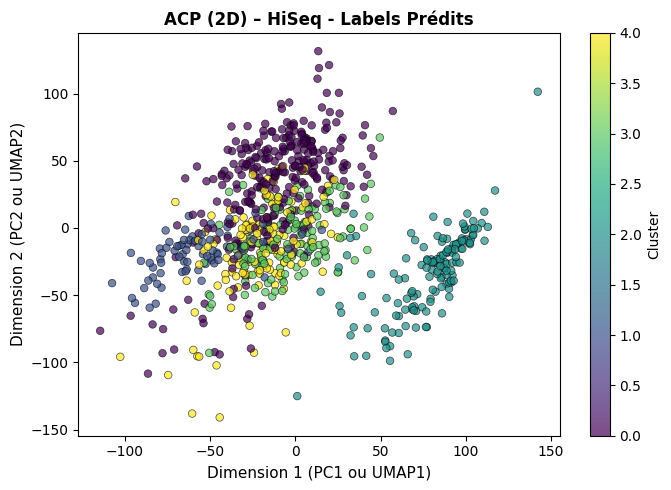

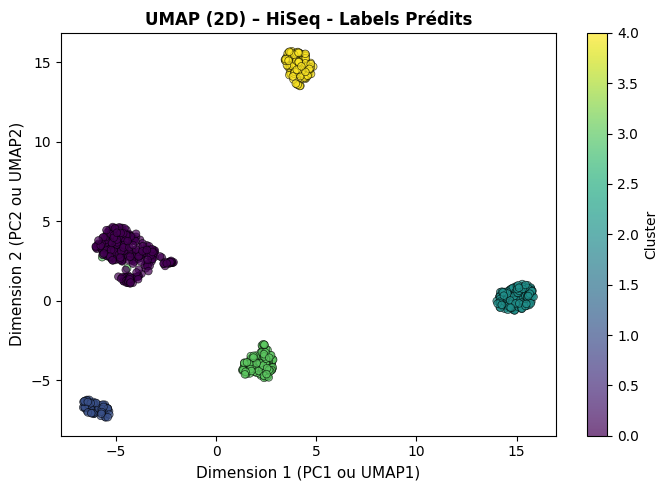

In [7]:
plot_2d_embedding(pca2, y_encoded, title="ACP (2D) – HiSeq")
plot_2d_embedding(umap2, y_encoded, title="UMAP (2D) – HiSeq")


# Partie Clustering

In [8]:
results_km_raw = run_clustering_multiple_seeds(
    X = X_scaled,     # normalisé mais non réduit
    algo_model_func = get_kmeans_model,
    algo_name = 'kmeans',
    n_clusters = 5,
    n_seeds = 10,
    y_true = y_encoded
)


In [9]:
results_km_pca = run_clustering_multiple_seeds(
    X = X_pca100,
    algo_model_func = get_kmeans_model,
    algo_name = 'kmeans',
    n_clusters = 5,
    n_seeds = 10,
    y_true = y_encoded
)

results_km_pca


{'labels_list': [array([1, 3, 1, 1, 0, 1, 4, 1, 0, 1, 0, 4, 1, 3, 0, 0, 3, 4, 4, 1, 0, 4,
         3, 0, 4, 3, 2, 0, 3, 0, 0, 0, 4, 3, 1, 0, 4, 3, 0, 3, 4, 1, 1, 4,
         4, 0, 1, 2, 0, 3, 0, 3, 0, 1, 2, 3, 0, 2, 4, 0, 3, 3, 0, 3, 1, 2,
         0, 1, 4, 3, 4, 0, 3, 3, 0, 3, 0, 4, 1, 2, 0, 1, 0, 0, 1, 1, 0, 0,
         4, 3, 1, 1, 0, 3, 0, 1, 2, 0, 1, 0, 0, 4, 0, 4, 3, 4, 3, 2, 3, 3,
         1, 0, 3, 1, 0, 4, 4, 4, 0, 0, 3, 4, 3, 0, 1, 1, 1, 0, 4, 0, 2, 3,
         2, 0, 0, 4, 3, 0, 4, 2, 0, 1, 0, 4, 3, 2, 1, 0, 3, 3, 3, 3, 0, 0,
         3, 0, 0, 1, 1, 3, 1, 3, 4, 0, 1, 3, 2, 4, 3, 0, 4, 3, 0, 3, 0, 3,
         0, 1, 0, 4, 2, 4, 0, 1, 1, 1, 3, 3, 0, 3, 3, 4, 3, 1, 3, 0, 3, 0,
         3, 3, 0, 4, 4, 4, 4, 1, 3, 1, 3, 3, 3, 0, 1, 0, 1, 0, 0, 0, 3, 0,
         4, 3, 4, 4, 3, 0, 4, 1, 0, 3, 3, 1, 2, 3, 4, 1, 4, 2, 3, 4, 4, 3,
         1, 3, 3, 3, 4, 0, 3, 2, 0, 1, 3, 0, 1, 4, 1, 1, 1, 0, 2, 2, 3, 2,
         2, 1, 3, 0, 0, 4, 4, 0, 2, 1, 4, 1, 0, 0, 4, 0, 0, 0, 3, 3, 3, 0,
         0

In [10]:
results_km_umap = run_clustering_multiple_seeds(
    X = X_umap100,
    algo_model_func = get_kmeans_model,
    algo_name='kmeans',
    n_clusters=5,
    n_seeds=10,
    y_true=y_encoded
)

results_km_umap


{'labels_list': [array([3, 2, 3, 3, 0, 3, 1, 3, 0, 3, 0, 1, 3, 0, 0, 0, 2, 1, 1, 3, 0, 1,
         2, 0, 1, 2, 4, 0, 0, 0, 0, 0, 1, 0, 3, 0, 1, 2, 0, 0, 1, 3, 3, 1,
         1, 0, 3, 4, 0, 2, 0, 2, 0, 3, 4, 0, 0, 4, 1, 0, 2, 1, 0, 2, 3, 4,
         0, 3, 1, 0, 1, 0, 0, 2, 0, 2, 0, 1, 3, 4, 0, 3, 0, 0, 3, 3, 0, 0,
         1, 0, 3, 3, 0, 0, 0, 3, 4, 0, 3, 0, 0, 1, 0, 1, 2, 1, 2, 4, 2, 2,
         3, 0, 2, 3, 0, 1, 1, 1, 0, 0, 2, 1, 2, 0, 3, 3, 3, 0, 1, 0, 4, 0,
         4, 0, 0, 1, 2, 0, 1, 4, 0, 3, 0, 1, 2, 4, 3, 0, 2, 2, 2, 2, 0, 0,
         2, 0, 0, 3, 3, 2, 3, 2, 1, 0, 3, 2, 4, 1, 2, 0, 1, 2, 0, 2, 0, 0,
         0, 3, 0, 1, 4, 1, 0, 3, 3, 3, 2, 2, 0, 2, 2, 1, 2, 3, 2, 0, 0, 0,
         2, 2, 0, 1, 1, 1, 1, 3, 0, 3, 0, 2, 2, 0, 3, 0, 3, 0, 0, 0, 2, 0,
         1, 2, 1, 1, 2, 0, 1, 3, 0, 2, 2, 3, 4, 0, 1, 3, 1, 4, 0, 1, 1, 2,
         3, 3, 2, 2, 1, 0, 0, 4, 0, 3, 4, 0, 3, 1, 3, 3, 3, 0, 4, 4, 2, 4,
         4, 3, 2, 0, 0, 1, 1, 0, 4, 3, 1, 3, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0,
         0

In [11]:
results_db_raw = run_clustering_multiple_seeds(
    X = X_scaled,
    algo_model_func = get_dbscan_model,
    algo_name='dbscan',
    eps=3.0,
    min_samples=5,
    n_seeds=10,
    y_true=y_encoded
)


In [12]:
results_db_pca = run_clustering_multiple_seeds(
    X = X_pca100,
    algo_model_func = get_dbscan_model,
    algo_name = 'dbscan',
    n_seeds = 10,
    y_true = y_encoded,
    eps = 2.0,
    min_samples = 5
)


In [13]:
results_db_umap = run_clustering_multiple_seeds(
    X = X_umap100,
    algo_model_func = get_dbscan_model,
    algo_name='dbscan',
    n_seeds=10,
    y_true=y_encoded,
    eps=1.5,
    min_samples=5
)


In [14]:
results_sp_raw = run_clustering_multiple_seeds(
    X = X_scaled,
    algo_model_func = get_spectral_model,
    algo_name='spectral',
    n_clusters=5,
    n_seeds=10,
    y_true=y_encoded
)


c:\Users\jenja\miniconda3\envs\udes_sd_a25\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\jenja\miniconda3\envs\udes_sd_a25\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\jenja\miniconda3\envs\udes_sd_a25\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\jenja\miniconda3\envs\udes_sd_a25\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\jenja\miniconda3\envs\udes_sd_a25\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectra

In [15]:
results_sp_pca = run_clustering_multiple_seeds(
    X = X_pca100,
    algo_model_func = get_spectral_model,
    algo_name='spectral',
    n_clusters=5,
    n_seeds=10,
    y_true=y_encoded
)


c:\Users\jenja\miniconda3\envs\udes_sd_a25\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\jenja\miniconda3\envs\udes_sd_a25\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\jenja\miniconda3\envs\udes_sd_a25\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\jenja\miniconda3\envs\udes_sd_a25\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\jenja\miniconda3\envs\udes_sd_a25\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectra

In [16]:
results_sp_umap = run_clustering_multiple_seeds(
    X = X_umap100,
    algo_model_func = get_spectral_model,
    algo_name='spectral',
    n_clusters=5,
    n_seeds=10,
    y_true=y_encoded
)


In [17]:
def summarize(results_dict):
    import numpy as np
    out = {}
    for key in ['silhouette','davies_bouldin','calinski_harabasz','ari','nmi']:
        vals = np.array(results_dict[key])
        out[key+"_mean"] = np.nanmean(vals)
        out[key+"_std"]  = np.nanstd(vals)
    return out

In [18]:
summary = pd.DataFrame({

    # ---------- K-MEANS ----------
    "KM_RAW":  summarize(results_km_raw),
    "KM_PCA":  summarize(results_km_pca),
    "KM_UMAP": summarize(results_km_umap),

    # ---------- DBSCAN ----------
    "DB_RAW":  summarize(results_db_raw),
    "DB_PCA":  summarize(results_db_pca),
    "DB_UMAP": summarize(results_db_umap),

    # ---------- SPECTRAL ----------
    "SP_RAW":  summarize(results_sp_raw),
    "SP_PCA":  summarize(results_sp_pca),
    "SP_UMAP": summarize(results_sp_umap),

}).T

summary


C:\Users\jenja\AppData\Local\Temp\ipykernel_27944\2025562783.py:6: RuntimeWarning: Mean of empty slice
  out[key+"_mean"] = np.nanmean(vals)
c:\Users\jenja\miniconda3\envs\udes_sd_a25\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


,silhouette_mean,silhouette_std,davies_bouldin_mean,davies_bouldin_std,calinski_harabasz_mean,calinski_harabasz_std,ari_mean,ari_std,nmi_mean,nmi_std
KM_RAW,0.135301,0.000290,2.640103,2.568473e-03,65.811482,5.651229e-03,0.800804,5.314908e-03,0.857328,2.372175e-03
KM_PCA,0.204892,0.000376,2.079626,2.346118e-03,104.769155,7.043911e-03,0.796796,6.195431e-03,0.855512,2.830155e-03
KM_UMAP,0.900756,0.000000,0.132809,2.775558e-17,25061.963082,3.637979e-12,0.992538,1.110223e-16,0.990693,4.965068e-17
DB_RAW,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000,0.000000e+00
DB_PCA,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000,0.000000e+00
DB_UMAP,0.900756,0.000000,0.132809,2.775558e-17,25061.963082,3.637979e-12,0.992538,1.110223e-16,0.990693,1.110223e-16
SP_RAW,-0.025926,0.007340,10.638561,1.800895e+00,0.972804,1.303129e-01,-0.000783,7.888038e-03,0.008898,2.161483e-03
SP_PCA,-0.035713,0.012668,10.607915,1.543539e+00,0.976883,1.742443e-01,0.002193,4.731845e-03,0.008675,2.701701e-03
SP_UMAP,0.352025,0.172512,1.006992,2.760113e-01,405.925153,2.786611e+02,0.668087,1.023512e-01,0.821195,5.726323e-02


" DBSCAN ne convient PAS pour Hi-Seq. 

# Partie 2 ECG Anomalie 
 enregistrements de l’activit´e ´electrique du cœur (ECG),
  Il est con¸cu pour :
 • Capturer les motifs typiques des signaux cardiaques normaux, comme les ondes P,
 QRS et T.
 • Identifier les anomalies telles que les arythmies, les battements pr´ematur´es ou les
 irr´egularit´es de fr´equence.

# Dataset ECG

## Description
Le jeu de données ECG contient des enregistrements de l'activité électrique du cœur (ECG), mesurée au fil du temps.

### Objectif
- Capturer les motifs typiques des signaux cardiaques normaux, comme les ondes P, QRS et T
- Identifier les anomalies telles que les arythmies, les battements prématurés ou les irrégularités de fréquence

## Structure des données

| Caractéristique | Valeur |
|---|---|
| **Nombre d'enregistrements** | 4998 |
| **Nombre d'attributs** | 141 |
| **Attributs de features** | 140 premiers attributs (caractéristiques extraites du signal cardiaque) |
| **Attribut de classe** | 141e attribut (indicateur d'anomalie) |

### Classes
- **0** : Signal normal (comportement physiologique normal)
- **1** : Anomalie (cas atypiques ou pathologiques)

## Chargement des données
```python
import numpy as np

data = np.load('ecg.npz')
df_ecg = data['ecg']
```

## Division des données pour la détection d'anomalies

### Ensemble d'entraînement (Training Set)
- **Contenu** : 60% des données normales uniquement
- **Objectif** : Permettre aux modèles non supervisés (auto-encodeurs) d'apprendre une représentation fidèle du comportement normal

### Ensemble de test (Test Set)
- **Contenu** : 
  - 30% des données normales
  - 80% des données anormales
- **Objectif** : Évaluer la capacité des modèles à détecter les écarts par rapport à la norme

### Ensemble de validation (Validation Set)
- **Contenu** :
  - 10% des données normales
  - 20% des données anormales
- **Objectif** : Déterminer le seuil de décision des auto-encodeurs en calibrant la frontière entre comportements normaux et anomalies à partir des erreurs de reconstruction

## Source
[Kaggle - Heartbeat Dataset](https://www.kaggle.com/datasets/shayanfazeli/heartbeat)

In [19]:
ecg_path = r"C:\Users\jenja\Desktop\Session automne 2025\Science_données\TP2 - IFT 599\ecg.npz"
ecg_data=scan_fichier_npz(ecg_path)
print(ecg_data)

NpzFile 'C:\\Users\\jenja\\Desktop\\Session automne 2025\\Science_données\\TP2 - IFT 599\\ecg.npz' with keys: ecg


In [20]:
print(ecg_data.files)

['ecg']


In [21]:
print("Clés disponibles :", list(ecg_data.keys()))
key="ecg"
print(f"{key}: {ecg_data[key].shape}")
print(ecg_data[key])


Clés disponibles : ['ecg']
ecg: (4998, 141)
[[0.56575121 0.40332497 0.17432985 ... 0.6603536  0.46577817 1.        ]
 [0.48124682 0.29266943 0.1086373  ... 0.67920847 0.3450321  1.        ]
 [0.52688582 0.42543966 0.16145521 ... 0.65831035 0.42020836 1.        ]
 ...
 [0.479358   0.45765568 0.29062168 ... 0.3757224  0.31745875 0.        ]
 [0.5285431  0.49203388 0.29419531 ... 0.68219946 0.51111535 0.        ]
 [0.45979477 0.46181072 0.33520026 ... 0.41749517 0.40073838 0.        ]]


# Entrainement


In [22]:
# %run main.py -b 64 -lr 0.00001 -w 0.001 -a 0.3 -e 100 -c 3 -es 50 --save_dir checkpoints

 SÉPARATION DES DONNÉES 
 

In [23]:
data=ecg_data[key]

In [24]:
print(data[:,-1])
num_anomalies,num_nomalies=data[:,-1].sum(),data[:,-1].shape[0]-data[:,-1].sum()
print(num_anomalies,num_nomalies)   

[1. 1. 1. ... 0. 0. 0.]
2919.0 2079.0


2079 NORMALES

    ├─→ 60% = 1751 → ENTRAÎNEMENT (TRAIN)

    ├─→ 30% = 876  → TEST

    └─→ 10% = 292  → VALIDATION 
    
2919 ANOMALIES

    ├─→ 80% = 1663 → TEST (avec les 876 normales)
    
    └─→ 20% = 416  → VALIDATION (avec les 292 normales)

| Ensemble | Normales | Anomalies | Total | Rôle |
|----------|----------|-----------|-------|------|
| **TRAIN** | 1751 | 0 | 1751 | Apprendre le "normal" |
| **VAL** | 292 | 416 | 708 | Trouver le meilleur seuil |
| **TEST** | 876 | 1663 | 2539 | Évaluer la performance |

In [25]:
# Le code de split 
# Split des données

# Charger les données
ecg_path = r"C:\Users\jenja\Desktop\Session automne 2025\Science_données\TP2 - IFT 599\ecg.npz"
ecg_data = scan_fichier_npz(ecg_path)
data = ecg_data['ecg']

# Appeler la fonction de split
train_set, val_set, test_set = split_ecg_data_step1(data)
# Vérifier les shapes
print("TRAIN shape:", train_set.shape)  # (1751, 141)
print("VAL shape:", val_set.shape)      # (708, 141)
print("TEST shape:", test_set.shape)    # (2539, 141)

# Vérifier la composition
print("\n--- COMPOSITION ---")
print(f"TRAIN: {(train_set[:, -1] == 0).sum()} normales, {(train_set[:, -1] == 1).sum()} anomalies")
print(f"VAL:   {(val_set[:, -1] == 0).sum()} normales, {(val_set[:, -1] == 1).sum()} anomalies")
print(f"TEST:  {(test_set[:, -1] == 0).sum()} normales, {(test_set[:, -1] == 1).sum()} anomalies")




Normales trouvées: 2079
Anomalies trouvées: 2919
TRAIN shape: (1247, 141)
VAL shape: (2958, 141)
TEST shape: (793, 141)

--- COMPOSITION ---
TRAIN: 1247 normales, 0 anomalies
VAL:   623 normales, 2335 anomalies
TEST:  209 normales, 584 anomalies


In [26]:
print(f"Label 0: {(data[:, -1] == 0).sum()}")
print(f"Label 1: {(data[:, -1] == 1).sum()}")

Label 0: 2079
Label 1: 2919


In [27]:
def split_ecg_data_step1(ecg_data):
    """
    Étape 1: Séparer normales et anomalies
    """
    # Séparer les données
    normales = ecg_data[ecg_data[:, -1] == 0]
    anomalies = ecg_data[ecg_data[:, -1] == 1]
    
    print(f"Normales trouvées: {len(normales)}")
    print(f"Anomalies trouvées: {len(anomalies)}")
    
    # Mélanger les données
    normales = normales[np.random.permutation(len(normales))]
    anomalies = anomalies[np.random.permutation(len(anomalies))]
    
    # Diviser NORMALES (60%, 30%, 10%)
    n_train = int(0.6 * len(normales))
    n_test = int(0.3 * len(normales))
    train_normal = normales[:n_train]
    test_normal = normales[n_train:n_train + n_test]
    val_normal = normales[n_train + n_test:]

    # Diviser ANOMALIES (80%, 20%)
    a_test = int(0.8 * len(anomalies))
    test_anomaly = anomalies[:a_test]
    val_anomaly = anomalies[a_test:]
    
    # Composer les ensembles finaux
    train_set = train_normal.copy()
    test_set = np.vstack([test_normal, test_anomaly])
    val_set = np.vstack([val_normal, val_anomaly])
    
    # Mélanger test et val
    test_set = test_set[np.random.permutation(len(test_set))]
    val_set = val_set[np.random.permutation(len(val_set))]
    
    return train_set, test_set, val_set

In [28]:
train_set, test_set, val_set = split_ecg_data_step1(data)

print(f"\nTRAIN shape: {train_set.shape}")
print(f"TEST shape: {test_set.shape}")
print(f"VAL shape: {val_set.shape}")

print(f"\n--- COMPOSITION ---")
print(f"TRAIN: {(train_set[:, -1] == 0).sum()} normales, {(train_set[:, -1] == 1).sum()} anomalies")
print(f"TEST:  {(test_set[:, -1] == 0).sum()} normales, {(test_set[:, -1] == 1).sum()} anomalies")
print(f"VAL:   {(val_set[:, -1] == 0).sum()} normales, {(val_set[:, -1] == 1).sum()} anomalies")


Normales trouvées: 2079
Anomalies trouvées: 2919

TRAIN shape: (1247, 141)
TEST shape: (2958, 141)
VAL shape: (793, 141)

--- COMPOSITION ---
TRAIN: 1247 normales, 0 anomalies
TEST:  623 normales, 2335 anomalies
VAL:   209 normales, 584 anomalies


Données chargées: (4998, 141)
  - Label 0 (normales): 2079
  - Label 1 (anomalies): 2919

ISOLATION FOREST - Détection d'Anomalies
Normales trouvées: 2079
Anomalies trouvées: 2919

Données splittées:
  - TRAIN: (1247, 140) (normales seulement)
  - TEST: (793, 140)
    • 209 normales
    • 584 anomalies

Entraînement IF (n_estimators=50)...
Entraînement terminé

Prédictions sur TEST...
Prédictions faites

Métriques:
  accuracy: 0.8789
  precision: 0.9729
  recall: 0.8596
  f1: 0.9127
  roc_auc: 0.8963

Matrice de confusion:
[[195  14]
 [ 82 502]]

AUTO-ENCODEUR - Détection d'Anomalies
Normales trouvées: 2079
Anomalies trouvées: 2919

Données splittées:
  - TRAIN: (1247, 140) (normales seulement)
  - VAL: (2958, 140)
  - TEST: (793, 140)

Préparation des données...

Création du modèle AE...
  Device: cpu

Entraînement (epochs=100)...


training: 100%|██████████| 20/20 [00:00<00:00, 276.28it/s, epoch=100, loss=0.1083]


model saved to checkpoints/AE.pt

Calcul des erreurs de reconstruction...

Recherche du seuil optimal...
  Seuil optimal: 0.1064

Métriques sur TEST:
  acc: 0.9079
  prec: 0.9036
  rec: 0.9795
  f1: 0.9400
  roc: 0.4998
  avgpr: 0.9425

Matrice de confusion:
[[572  12]
 [ 61 148]]

Visualisation des losses d'entraînement...


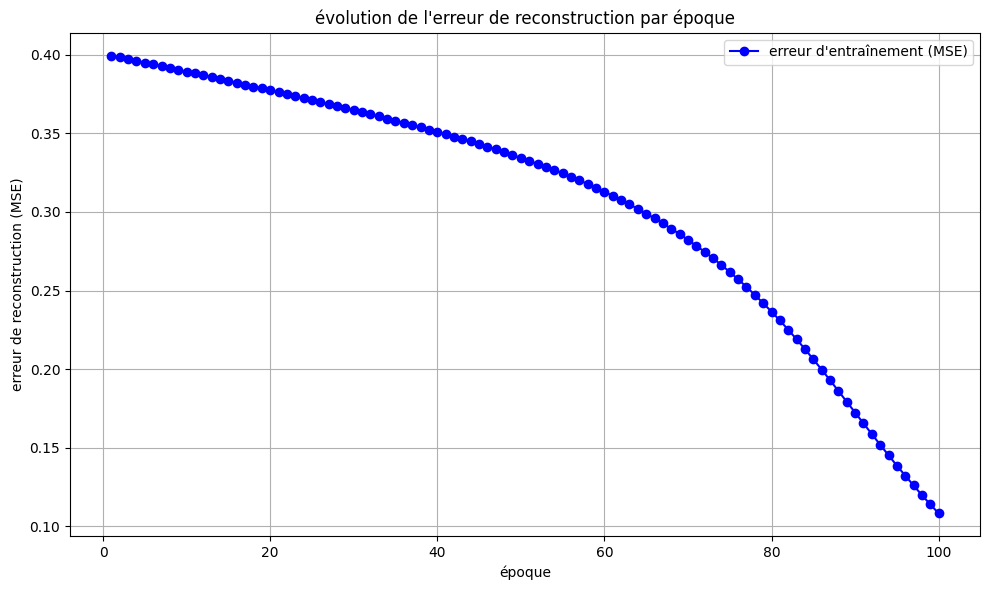


MC DROPOUT AUTO-ENCODEUR - Détection d'Anomalies
Normales trouvées: 2079
Anomalies trouvées: 2919

Données splittées:
  - TRAIN: (1247, 140) (normales seulement)
  - VAL: (2958, 140)
  - TEST: (793, 140)

Préparation des données...

Création du modèle MC Dropout AE...
  Device: cpu

Entraînement (epochs=100)...


training: 100%|██████████| 20/20 [00:00<00:00, 267.32it/s, epoch=100, loss=0.2020]


model saved to checkpoints/MCDropoutAE.pt

Calcul des erreurs de reconstruction avec MC Dropout...

Recherche du seuil optimal...
  Seuil optimal: 0.2442

Métriques sur TEST:
  acc: 0.6570
  prec: 0.7371
  rec: 0.8305
  f1: 0.7810
  roc: 0.4984
  avgpr: 0.6975

Matrice de confusion:
[[485  99]
 [173  36]]

Visualisation des losses d'entraînement...


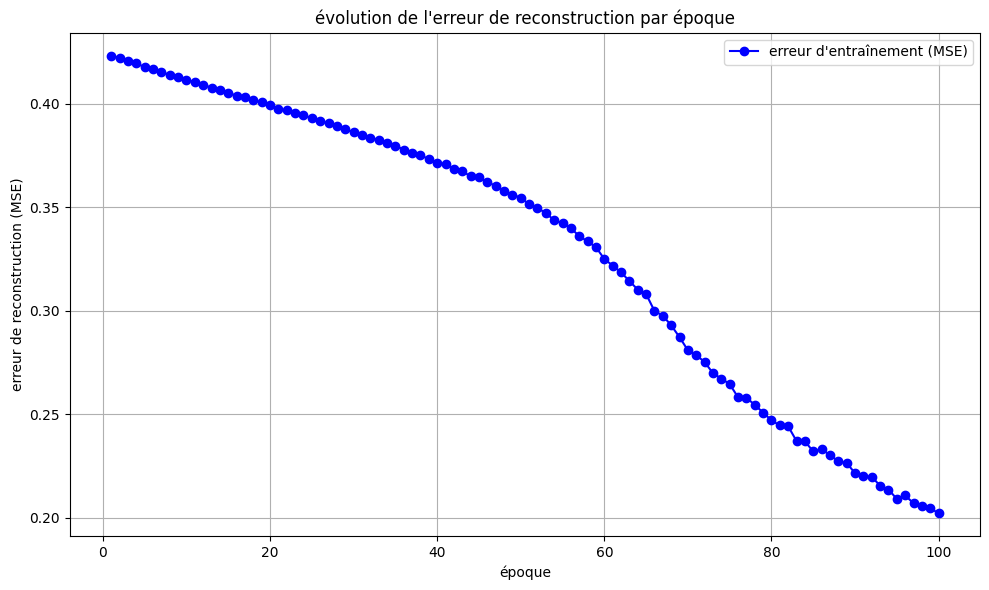


RÉSUMÉ DES RÉSULTATS

Isolation Forest:
  accuracy: 0.8789
  precision: 0.9729
  recall: 0.8596
  f1: 0.9127
  roc_auc: 0.8963

Auto-encodeur:
  acc: 0.9079
  prec: 0.9036
  rec: 0.9795
  f1: 0.9400
  roc: 0.4998
  avgpr: 0.9425

MC Dropout Auto-encodeur:
  acc: 0.6570
  prec: 0.7371
  rec: 0.8305
  f1: 0.7810
  roc: 0.4984
  avgpr: 0.6975


In [29]:
%run main.py -b 64 -lr 0.00001 -w 0.001 -a 0.3 -e 100 -c 3 -es 50 --save_dir checkpoints
